# Use Before Finito

> Diagram of the proposed flows/components

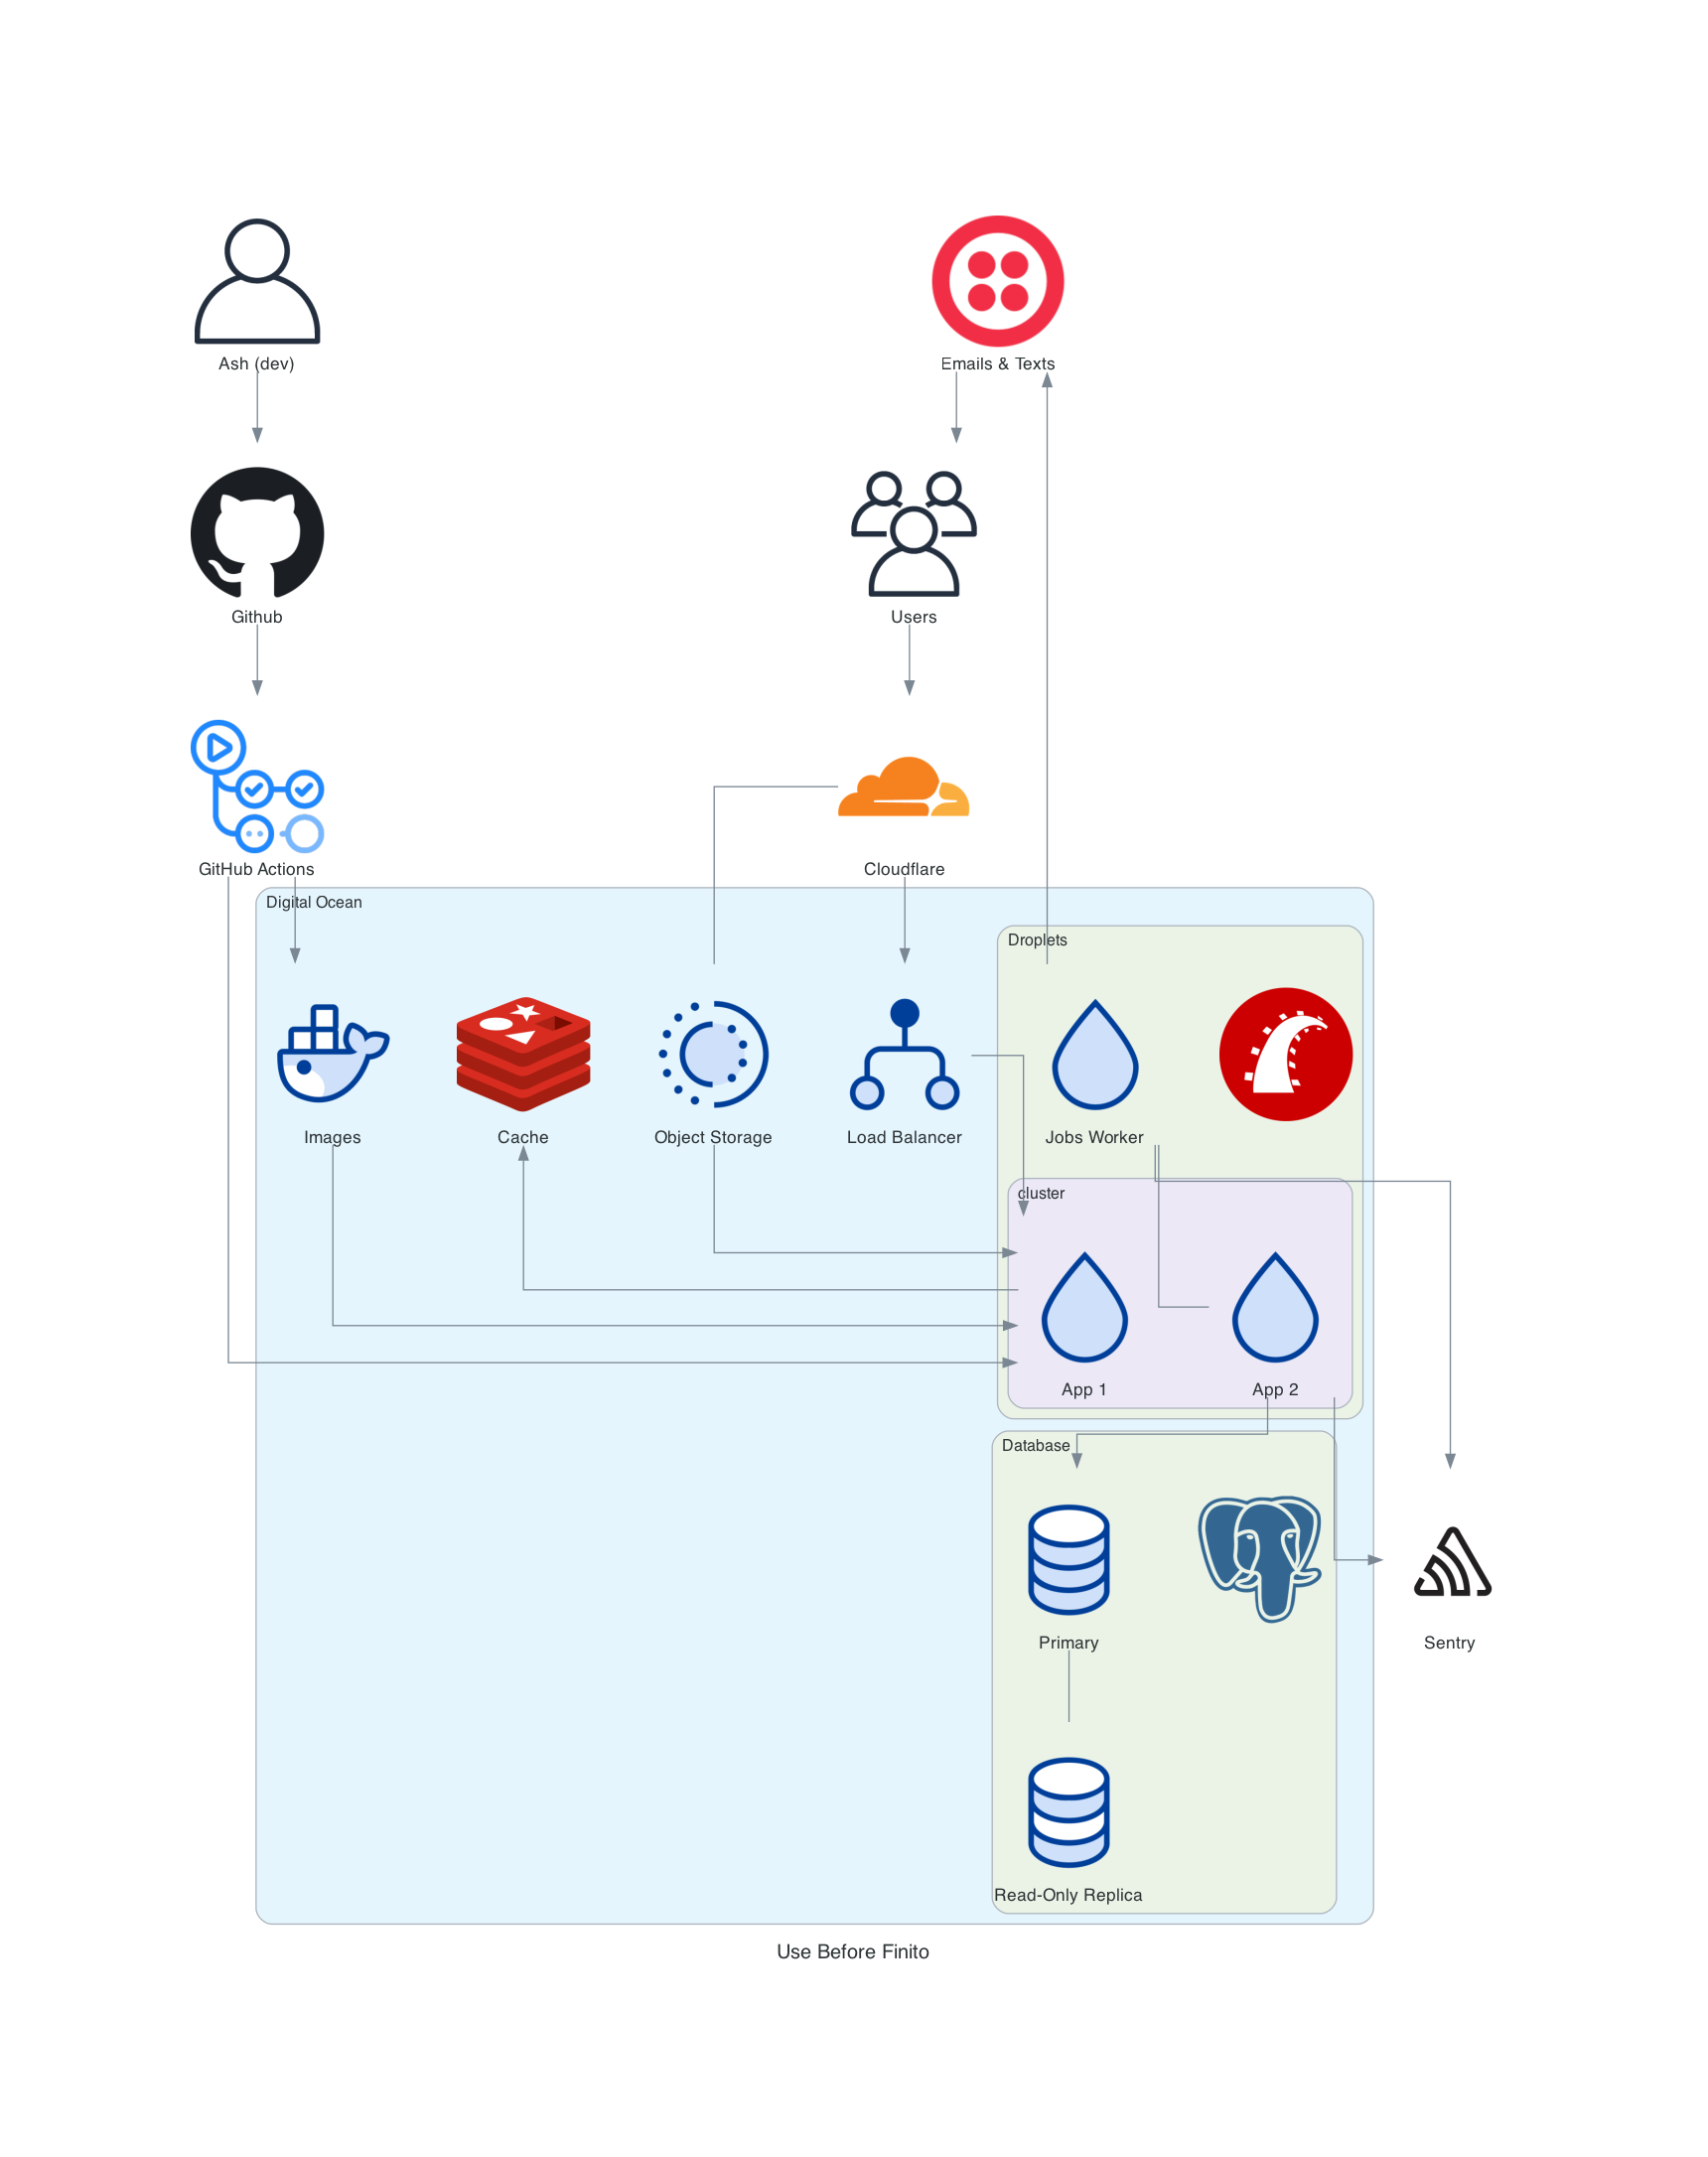

In [3]:
from diagrams import Diagram, Cluster
from diagrams.digitalocean.network import LoadBalancer
from diagrams.digitalocean.compute import Droplet, Docker
from diagrams.digitalocean.database import DbaasPrimary, DbaasReadOnly
from diagrams.digitalocean.storage import Space
from diagrams.saas.cdn import Cloudflare
from diagrams.saas.communication import Twilio
from diagrams.onprem.client import Users, User
from diagrams.programming.framework import Rails
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.monitoring import Sentry
from diagrams.onprem.ci import GithubActions
from diagrams.onprem.vcs import Github

with Diagram("Use Before Finito", show=False, direction="TB") as diag:
    cf = Cloudflare("Cloudflare")
    users = Users("Users")
    users >> cf
    with Cluster("Digital Ocean"):
        lb = LoadBalancer("Load Balancer")
        docker = Docker("Images")
        cf >> lb

        with Cluster("Droplets", direction="LR"):
            rails = Rails()
            with Cluster():
                app1 = Droplet("App 1")
                app2 = Droplet("App 2")
            worker = Droplet("Jobs Worker")
            worker - app2

        store = Space("Object Storage")
        cf - store >> app1
        redis = Redis("Cache")
        redis << app1

        with Cluster("Database", direction="RL"):
            pg = PostgreSQL()
            db_primary = DbaasPrimary("Primary")
            db_replica = DbaasReadOnly("Read-Only Replica")
            db_primary - db_replica

        lb >> app1
        app2 >> db_primary
    sentry = Sentry("Sentry")
    [worker, app2] >> sentry
    github = Github("Github")
    gh_actions = GithubActions("GitHub Actions")
    User("Ash (dev)") >> github >> gh_actions >> app1
    gh_actions >> docker >> app1
    worker >> Twilio("Emails & Texts") >> users

diag